In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Loading data sets
train = pd.read_csv('C:\\Users\\CE-USER\\Desktop\\comp\\titanic\\train.csv')
test = pd.read_csv('C:\\Users\\CE-USER\\Desktop\\comp\\titanic\\test.csv')

In [3]:
# Exploring train data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Handling with missing data
train['Age'].fillna(train['Age'].mean(), inplace=True)

In [7]:
train.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,168,168,168,168,168,168,168,168,168,168,69
Q,77,77,77,77,77,77,77,77,77,77,4
S,644,644,644,644,644,644,644,644,644,644,129


In [8]:
train['Embarked'].fillna('S', inplace=True)

In [9]:
# Adding new variables
train['aloneornot'] = np.where((train['SibSp']<1) & (train['Parch']<1), 0, 1)

In [10]:
train['youngness'] = np.where((train['Age']<18), "child", np.where((train['Age']>=18) & (train['Age'] < 40), "young", "old"))

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,aloneornot,youngness
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,young
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,young
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,young


In [12]:
# Changing data types
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
aloneornot       int32
youngness       object
dtype: object

In [13]:
# train['Survived'] = train['Survived'].astype(object)
# train['Pclass'] = train['Pclass'].astype(object)
# train['aloneornot'] = train['aloneornot'].astype(object)

In [14]:
# Removing unnecessary variables
train = train.drop(['Name','Ticket','Fare','Cabin'], axis=1)

In [15]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,aloneornot,youngness
0,1,0,3,male,22.0,1,0,S,1,young
1,2,1,1,female,38.0,1,0,C,1,young
2,3,1,3,female,26.0,0,0,S,0,young
3,4,1,1,female,35.0,1,0,S,1,young
4,5,0,3,male,35.0,0,0,S,0,young


In [16]:
# Visualizing
## Pclass-Sex surviving percentages
cl1 = train.groupby(['Sex','Pclass'],as_index=False)['Survived'].count()
cl1.columns = ['Sex','Pclass','count1']
cl1

,Sex,Pclass,count1
0,female,1,94
1,female,2,76
2,female,3,144
3,male,1,122
4,male,2,108
5,male,3,347


In [17]:
cl2 = train[train['Survived']==1].groupby(['Sex','Pclass'], as_index=False)['Survived'].count()
cl2.columns = ['Sex','Pclass','count2']
cl2

,Sex,Pclass,count2
0,female,1,91
1,female,2,70
2,female,3,72
3,male,1,45
4,male,2,17
5,male,3,47


In [18]:
cl = pd.merge(cl1,cl2)
cl

,Sex,Pclass,count1,count2
0,female,1,94,91
1,female,2,76,70
2,female,3,144,72
3,male,1,122,45
4,male,2,108,17
5,male,3,347,47


In [19]:
cl['perc'] = cl['count2']/cl['count1']*100
cl

,Sex,Pclass,count1,count2,perc
0,female,1,94,91,96.808511
1,female,2,76,70,92.105263
2,female,3,144,72,50.000000
3,male,1,122,45,36.885246
4,male,2,108,17,15.740741
5,male,3,347,47,13.544669


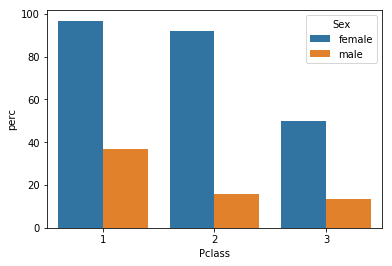

In [20]:
sns.barplot(x="Pclass",y="perc",data=cl,hue='Sex')

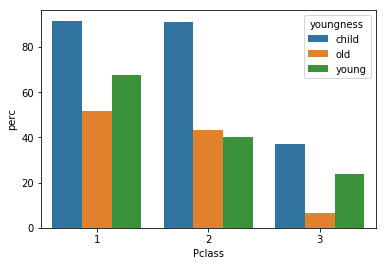

In [21]:
## Pclass-youngness surviving percentages
yp1 = train.groupby(['youngness','Pclass'],as_index=False)['Survived'].count()
yp1.columns = ['youngness','Pclass','count1']
yp2 = train[train['Survived']==1].groupby(['youngness','Pclass'], as_index=False)['Survived'].count()
yp2.columns = ['youngness','Pclass','count2']
yp = pd.merge(yp1,yp2)
yp['perc'] = yp['count2']/yp['count1']*100
sns.barplot(x="Pclass",y="perc",data=yp,hue='youngness')

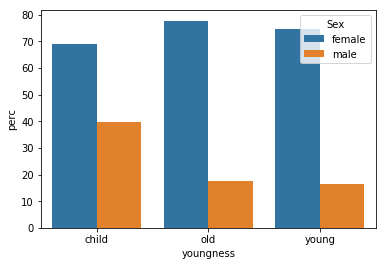

In [22]:
## youngness-Sex surviving percentages
ys1 = train.groupby(['youngness','Sex'],as_index=False)['Survived'].count()
ys1.columns = ['youngness','Sex','count1']
ys2 = train[train['Survived']==1].groupby(['youngness','Sex'], as_index=False)['Survived'].count()
ys2.columns = ['youngness','Sex','count2']
ys = pd.merge(ys1,ys2)
ys['perc'] = ys['count2']/ys['count1']*100
sns.barplot(x="youngness",y="perc",data=ys,hue='Sex')

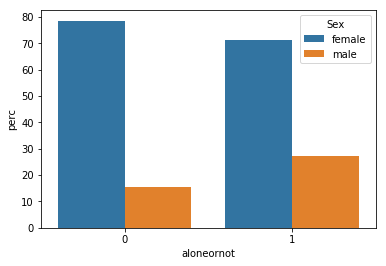

In [23]:
## aloneornot-Sex surviving percentages
as1 = train.groupby(['aloneornot','Sex'],as_index=False)['Survived'].count()
as1.columns = ['aloneornot','Sex','count1']
as2 = train[train['Survived']==1].groupby(['aloneornot','Sex'], as_index=False)['Survived'].count()
as2.columns = ['aloneornot','Sex','count2']
as3 = pd.merge(as1,as2)
as3['perc'] = as3['count2']/as3['count1']*100
sns.barplot(x="aloneornot",y="perc",data=as3,hue='Sex')

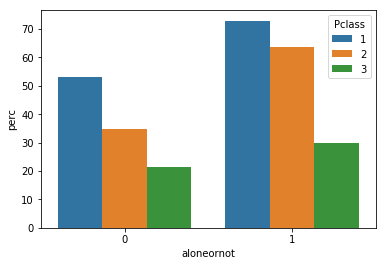

In [24]:
## aloneornot-Pclass surviving percentages
ap1 = train.groupby(['aloneornot','Pclass'],as_index=False)['Survived'].count()
ap1.columns = ['aloneornot','Pclass','count1']
ap2 = train[train['Survived']==1].groupby(['aloneornot','Pclass'], as_index=False)['Survived'].count()
ap2.columns = ['aloneornot','Pclass','count2']
ap3 = pd.merge(ap1,ap2)
ap3['perc'] = ap3['count2']/ap3['count1']*100
sns.barplot(x="aloneornot",y="perc",data=ap3,hue='Pclass')

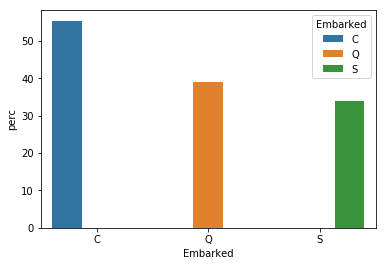

In [25]:
## Embarked surviving percentages
e1 = train.groupby(['Embarked'],as_index=False)['Survived'].count()
e1.columns = ['Embarked','count1']
e2 = train[train['Survived']==1].groupby(['Embarked'], as_index=False)['Survived'].count()
e2.columns = ['Embarked','count2']
e3 = pd.merge(e1,e2)
e3['perc'] = e3['count2']/e3['count1']*100
sns.barplot(x="Embarked",y="perc",data=e3,hue='Embarked')

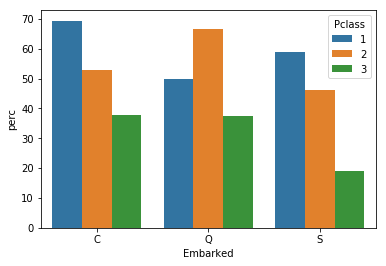

In [26]:
## Embarked-Pclass surviving percentages
ep1 = train.groupby(['Embarked','Pclass'],as_index=False)['Survived'].count()
ep1.columns = ['Embarked','Pclass','count1']
ep2 = train[train['Survived']==1].groupby(['Embarked','Pclass'], as_index=False)['Survived'].count()
ep2.columns = ['Embarked','Pclass','count2']
ep3 = pd.merge(ep1,ep2)
ep3['perc'] = ep3['count2']/ep3['count1']*100
sns.barplot(x="Embarked",y="perc",data=ep3,hue='Pclass')

In [27]:
## Encoding categorical data
genders = {"male":0, "female":1}
train["Sex"] = train["Sex"].map(genders)

In [28]:
embarked = {"S":0, "C":1, "Q":2}
train["Embarked"] = train["Embarked"].map(embarked)

In [29]:
# Repeating same data cleaning for test data
## Exploring test data
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [30]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [31]:
## Handling with missing data
test['Age'].fillna(test['Age'].mean(), inplace=True)

In [32]:
## Adding new variables
test['aloneornot'] = np.where((test['SibSp']<1) & (test['Parch']<1), 0, 1)
test['youngness'] = np.where((test['Age']<18), "child", np.where((test['Age']>=18) & (test['Age'] < 40), "young", "old"))

In [33]:
## Removing unnecessary variables
test = test.drop(['Name','Ticket','Fare','Cabin'], axis=1)

In [34]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,aloneornot,youngness
0,892,3,male,34.5,0,0,Q,0,young
1,893,3,female,47.0,1,0,S,1,old
2,894,2,male,62.0,0,0,Q,0,old
3,895,3,male,27.0,0,0,S,0,young
4,896,3,female,22.0,1,1,S,1,young


In [35]:
## Changing data types
# test['Pclass'] = test['Pclass'].astype(object)
# test['aloneornot'] = test['aloneornot'].astype(object)

In [36]:
## Encoding categorical data
genders = {"male":0, "female":1}
test["Sex"] = test["Sex"].map(genders)

In [37]:
embarked = {"S":0, "C":1, "Q":2}
test["Embarked"] = test["Embarked"].map(embarked)

In [38]:
# Machine Learning Algorithms
## Splitting the data into features and output
train_x = train.iloc[:,[2,3,4,7,8]]
train_y = train.iloc[:,1]
test_x = test.iloc[:,[1,2,3,6,7]]

In [39]:
## Random Forest Algorithm
classifier = RandomForestClassifier(n_estimators=1000, criterion="entropy", random_state=0)

In [40]:
classifier.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [42]:
prediction = classifier.predict(test_x)



In [43]:
prediction

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [48]:
submission =pd.DataFrame({"PassengerId" : test["PassengerId"], "Survived":prediction[:]})

In [54]:
submission.to_csv(r'C:\Users\CE-USER\Desktop\comp\titanic\subm_python.csv', index=None)